In [171]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [172]:
#import the train and test datasets
df_train = pd.read_csv('/content/drive/MyDrive/Dataset Files/train_MpHjUjU.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Dataset Files/test_hXY9mYw.csv')
train = pd.read_csv('/content/drive/MyDrive/Dataset Files/train_MpHjUjU.csv')

In [173]:
df_train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [174]:
df_test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [175]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [176]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Emp_ID  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


We have a combination of data types in the data. 

The important thing to note here is that the target variable is not specified and we have to generate it.

The test data contains only the ids of employees for whom the target class needs to be predicted. 

The data for these id's is contained in the training csv. Therefore, this is not the usual case of train-test split.

## Exploratory Data Analysis

Let us have a look at all the columns in the train data

In [177]:
df_train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [178]:
df_train['MMM-YY'].head()

0    2016-01-01
1    2016-02-01
2    2016-03-01
3    2017-11-01
4    2017-12-01
Name: MMM-YY, dtype: object

This column is the column which contains the date of reporting for the employees. We can rename and edit the data type for this column

In [179]:
df_train.rename(columns={"MMM-YY":"Reporting_Date"}, inplace=True)
df_train.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [180]:
df_train['Reporting_Date'].dtypes

dtype('O')

In [181]:
df_train['Reporting_Date'] = df_train['Reporting_Date'].astype('datetime64')

In [182]:
df_train['Reporting_Date'].dtypes

dtype('<M8[ns]')

In [183]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

Let us have a look at the age column

(array([ 603., 2556., 4399., 3622., 3787., 2244., 1128.,  536.,  201.,
          28.]),
 array([21. , 24.7, 28.4, 32.1, 35.8, 39.5, 43.2, 46.9, 50.6, 54.3, 58. ]),
 <a list of 10 Patch objects>)

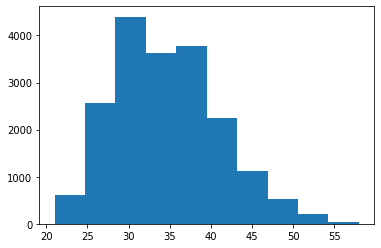

In [184]:
plt.hist(df_train['Age'])

We can observe that age is fairly normal in distribution. Let us check the summary statistics for the column

In [185]:
df_train['Age'].describe()

count    19104.000000
mean        34.650283
std          6.264471
min         21.000000
25%         30.000000
50%         34.000000
75%         39.000000
max         58.000000
Name: Age, dtype: float64

We can see that the age shows
1. Mean - 34
2. Median - 34
3. Max age - 58
4. Min age - 21

In [186]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [187]:
df_train['Gender'].value_counts()

Male      11103
Female     8001
Name: Gender, dtype: int64

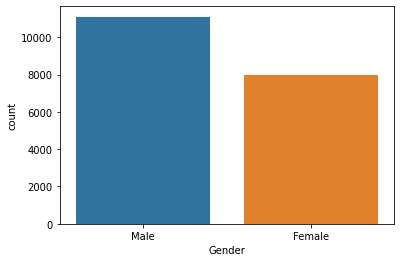

In [188]:
sns.countplot(x=df_train['Gender'])

We can observe that the distribution of male and female employees is quite balanced in the data.

In [189]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [190]:
df_train['City'].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

We can observe that there are 29 cities from which the employees belong to.

In [191]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [192]:
df_train['Education_Level'].value_counts()

Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64

There are 3 degrees of education that employees have been categorized into. Let us check the distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


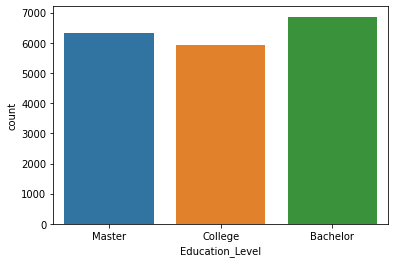

In [193]:
sns.countplot(df_train['Education_Level'])

We can observe that more number of employees have a bachelor's degree followed by master's and then college(maybe higher college).

Interestingly, the number of employees who attended college is almost similar to the ones who got their Master degree.

In [194]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

Let us have a look at the salary distribution for the employees

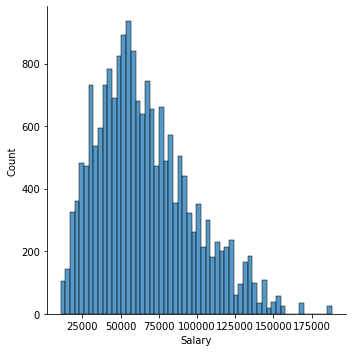

In [195]:
sns.displot(data=df_train, x='Salary' )

From the above plot, we can observe that the column is moderately right skewed. Let us check the summary statistics

In [196]:
df_train['Salary'].describe()

count     19104.000000
mean      65652.025126
std       30914.515344
min       10747.000000
25%       42383.000000
50%       60087.000000
75%       83969.000000
max      188418.000000
Name: Salary, dtype: float64

The mean salary for the employees is 65652 whereas the median salary is around 60K.
This implies the presence of outliers possibly people in the higher management who have much larger salaries.
This can be seen from the max salary drawn which is 188,418.

In [197]:
df_train['Salary'].skew()

0.7059850785712668

In [198]:
#Moderately skewed

In [199]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [200]:
df_train['Dateofjoining']

0        2015-12-24
1        2015-12-24
2        2015-12-24
3        2017-11-06
4        2017-11-06
            ...    
19099    2017-06-08
19100    2017-06-08
19101    2017-06-08
19102    2017-06-08
19103    2017-06-08
Name: Dateofjoining, Length: 19104, dtype: object

In [201]:
#change the data type of the column
df_train['Dateofjoining'] = df_train['Dateofjoining'].astype('datetime64')

In [202]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [203]:
df_train['LastWorkingDate'].dtypes

dtype('O')

In [204]:
df_train['LastWorkingDate']

0               NaN
1               NaN
2        2016-03-11
3               NaN
4               NaN
            ...    
19099           NaN
19100           NaN
19101           NaN
19102           NaN
19103           NaN
Name: LastWorkingDate, Length: 19104, dtype: object

We have missing values in this column. Let's get back to missing values later

In [205]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [206]:
df_train['Joining Designation'].value_counts()

1    9831
2    5955
3    2847
4     341
5     130
Name: Joining Designation, dtype: int64

Higher the number, higher the desigation. We can see more instances of employees joining at a lower designation which could mean they are possibly freshers or early career professionals

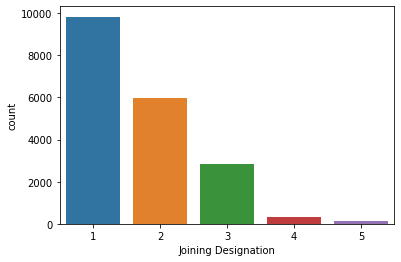

In [207]:
sns.countplot(x=df_train['Joining Designation'])

Let us have a look at the distribution of the current designation of the employees

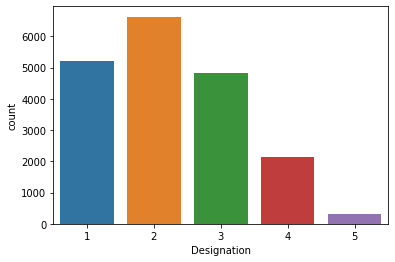

In [208]:
sns.countplot(x=df_train['Designation'])

Most of the employees have higher designation as we can see but surprisingly there are almost quite high number of employees who are in the same designation as seen in 1.

These are the employees to be targeted that could lead to possible attrition. Also we have to consider those employees in the higher designation who joined at a higher level but have not moved up the ranks so far.

In [209]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [210]:
df_train['Total Business Value']

0        2381060
1        -665480
2              0
3              0
4              0
          ...   
19099     740280
19100     448370
19101          0
19102     200420
19103     411480
Name: Total Business Value, Length: 19104, dtype: int64

(array([5.0000e+00, 1.7943e+04, 1.0140e+03, 9.9000e+01, 3.1000e+01,
        9.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-6000000., -2025228.,  1949544.,  5924316.,  9899088., 13873860.,
        17848632., 21823404., 25798176., 29772948., 33747720.]),
 <a list of 10 Patch objects>)

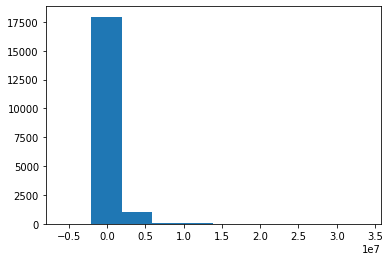

In [211]:
#let us check the distribution for this column
plt.hist(data=df_train, x='Total Business Value')

The distribution is uneven with more number of employees having a positive business value.

In [212]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [213]:
df_train['Quarterly Rating']

0        2
1        2
2        2
3        1
4        1
        ..
19099    3
19100    3
19101    2
19102    2
19103    2
Name: Quarterly Rating, Length: 19104, dtype: int64

In [214]:
df_train['Quarterly Rating'].value_counts()

1    7679
2    5553
3    3895
4    1977
Name: Quarterly Rating, dtype: int64

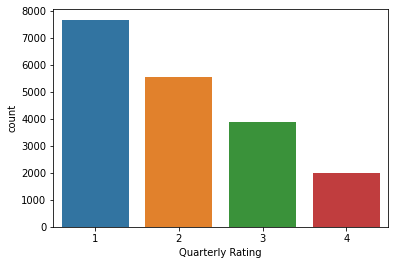

In [215]:
sns.countplot(x=df_train['Quarterly Rating'])

Higher the number, better is the rating.

We can see a substantial high number of employees who have less rating(1) as compared to those who have high rating(4)

In [216]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reporting_Date        19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

### Missing values

In [217]:
df_train.isnull().sum()

Reporting_Date              0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

We can see that there high number of missing values in the lastworkingdate column.
Let us find the percentage of the missing values 

In [218]:
df_train['LastWorkingDate'].isnull().sum() / len(df_train)

0.9154103852596315

We have almost 92% missing data in this column.

We could use this feature as our target variable provided we do some feature engineering.

### Feature Engineering

We can see that Gender, City and Education_Level are categorical columns. 
In order to make our predictions, we need to convert them.
Let us have a look at feature engineering the columns one by one starting with **Gender**

In [219]:
df_train['Gender'].value_counts()

Male      11103
Female     8001
Name: Gender, dtype: int64

We can set Male as 0 and Female as 1

In [220]:
df_train['Gender'] = df_train['Gender'].replace({"Male":0, "Female":1})

In [221]:
df_train['Gender'].value_counts()

0    11103
1     8001
Name: Gender, dtype: int64

**City**

In [222]:
df_train['City'].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

As we had observed during the EDA, the city consists of 29 cities. 

The job location is one such thing that an employee takes into account while signing up for the job in the first place. 

Therefore, in order to reduce the curse of dimensionality, we will not consider the Cities in our predictions.

In order to use this column, we first need to drop the City column from the original data

In [223]:
df_train.drop('City', axis=1, inplace=True)

In [224]:
df_train.columns

Index(['Reporting_Date', 'Emp_ID', 'Age', 'Gender', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [225]:
df_train.head()

,Reporting_Date,Emp_ID,Age,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,0,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,0,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,0,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,0,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,0,Master,67016,2017-11-06,NaN,2,2,0,1


**Education_Level**

For feature engineering, we will set Bachelors as 2, Masters as 3 and College as 1.

In [226]:
df_train['Education_Level'].value_counts()

Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64

In [227]:
df_train['Education_Level'] = df_train['Education_Level'].replace({"Bachelor":2, "Master":3, "College":1})

In [228]:
df_train['Education_Level'].value_counts()

2    6864
3    6327
1    5913
Name: Education_Level, dtype: int64

In [229]:
df_train.head()

,Reporting_Date,Emp_ID,Age,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,0,3,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,0,3,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,0,3,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,0,3,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,0,3,67016,2017-11-06,NaN,2,2,0,1


We can create a new feature called **Days_active** which would indicate the number of days an employee is working or is active as the difference between the reporting_date and the dateofjoining.

Days_active = Reporting_Date - Dateofjoining

In [230]:
df_train['Days_active'] = (df_train['Reporting_Date'] - df_train['Dateofjoining']).dt.days

In [231]:
df_train.head()

,Reporting_Date,Emp_ID,Age,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Days_active
0,2016-01-01,1,28,0,3,57387,2015-12-24,NaN,1,1,2381060,2,8
1,2016-02-01,1,28,0,3,57387,2015-12-24,NaN,1,1,-665480,2,39
2,2016-03-01,1,28,0,3,57387,2015-12-24,2016-03-11,1,1,0,2,68
3,2017-11-01,2,31,0,3,67016,2017-11-06,NaN,2,2,0,1,-5
4,2017-12-01,2,31,0,3,67016,2017-11-06,NaN,2,2,0,1,25


Let us take a look at the lastworkingdate column and try to convert this to our target variable.

**If the columns contains an entry with a date, we will consider value of 1(employee leaves the organization) and if nan then 0(employee does not leave the organization)**

In [232]:
#replace nan with 0
df_train['LastWorkingDate'] = df_train['LastWorkingDate'].fillna(0)

In [233]:
df_train['LastWorkingDate'].value_counts()

0             17488
2017-07-29       70
2016-09-22       26
2016-03-17       14
2017-02-17       13
              ...  
2017-04-04        1
2017-02-01        1
2017-10-28        1
2017-04-22        1
2016-05-19        1
Name: LastWorkingDate, Length: 494, dtype: int64

In [234]:
#replace dates with 1 by creating a custom function
def dates(d):
  if d != 0:
    return 1

In [235]:
df_train['LastWorkingDate'] = df_train['LastWorkingDate'].apply(dates)

In [236]:
df_train['LastWorkingDate'].value_counts()

1.0    1616
Name: LastWorkingDate, dtype: int64

In [237]:
#check for missing values again
df_train['LastWorkingDate'].isnull().sum()

17488

In [238]:
#replace the missing values by 0
df_train['LastWorkingDate'] = df_train['LastWorkingDate'].fillna(0)

In [239]:
df_train['LastWorkingDate'].value_counts()

0.0    17488
1.0     1616
Name: LastWorkingDate, dtype: int64

In [240]:
df_train['LastWorkingDate'].dtypes

dtype('float64')

In [241]:
df_train.head()

,Reporting_Date,Emp_ID,Age,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Days_active
0,2016-01-01,1,28,0,3,57387,2015-12-24,0.0,1,1,2381060,2,8
1,2016-02-01,1,28,0,3,57387,2015-12-24,0.0,1,1,-665480,2,39
2,2016-03-01,1,28,0,3,57387,2015-12-24,1.0,1,1,0,2,68
3,2017-11-01,2,31,0,3,67016,2017-11-06,0.0,2,2,0,1,-5
4,2017-12-01,2,31,0,3,67016,2017-11-06,0.0,2,2,0,1,25


Convert the lastworkingdate column to int data type and rename it as the target variable

In [242]:
#convert to int data type
df_train['LastWorkingDate'] = df_train['LastWorkingDate'].astype('int64')

In [243]:
df_train['LastWorkingDate'].dtypes

dtype('int64')

In [244]:
#rename the column as 'Target'
df_train.rename(columns={"LastWorkingDate":"Target"}, inplace=True)

In [245]:
df_train.head()

,Reporting_Date,Emp_ID,Age,Gender,Education_Level,Salary,Dateofjoining,Target,Joining Designation,Designation,Total Business Value,Quarterly Rating,Days_active
0,2016-01-01,1,28,0,3,57387,2015-12-24,0,1,1,2381060,2,8
1,2016-02-01,1,28,0,3,57387,2015-12-24,0,1,1,-665480,2,39
2,2016-03-01,1,28,0,3,57387,2015-12-24,1,1,1,0,2,68
3,2017-11-01,2,31,0,3,67016,2017-11-06,0,2,2,0,1,-5
4,2017-12-01,2,31,0,3,67016,2017-11-06,0,2,2,0,1,25


Considering building our prediction model, we dont want the columns: Reporting_Date, Emp_id and Dateofjoining	

We'd drop these columns

In [246]:
df_train.drop(['Reporting_Date', 'Dateofjoining'], axis=1, inplace=True)

In [247]:
df_train.columns

Index(['Emp_ID', 'Age', 'Gender', 'Education_Level', 'Salary', 'Target',
       'Joining Designation', 'Designation', 'Total Business Value',
       'Quarterly Rating', 'Days_active'],
      dtype='object')

In [248]:
df_train.head()

,Emp_ID,Age,Gender,Education_Level,Salary,Target,Joining Designation,Designation,Total Business Value,Quarterly Rating,Days_active
0,1,28,0,3,57387,0,1,1,2381060,2,8
1,1,28,0,3,57387,0,1,1,-665480,2,39
2,1,28,0,3,57387,1,1,1,0,2,68
3,2,31,0,3,67016,0,2,2,0,1,-5
4,2,31,0,3,67016,0,2,2,0,1,25


In [81]:
df_train.dtypes

Age                     int64
Gender                  int64
Education_Level         int64
Salary                  int64
Target                  int64
Joining Designation     int64
Designation             int64
Total Business Value    int64
Quarterly Rating        int64
Days_active             int64
dtype: object

Plot the correlation among variables

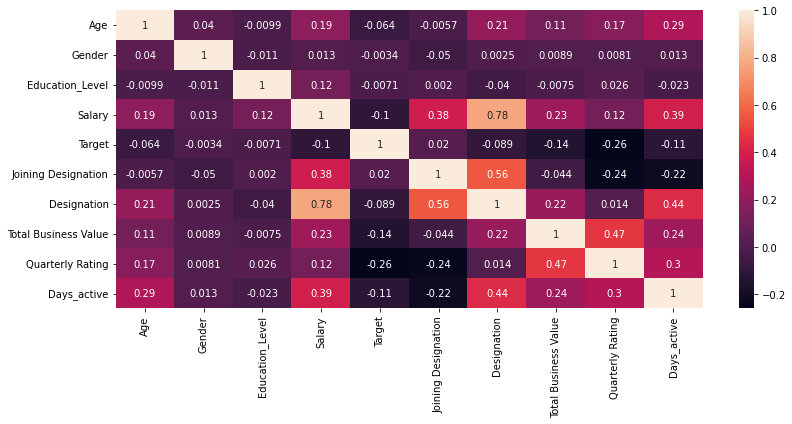

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(), annot=True)
plt.tight_layout()
plt.show()

Let us explore the relationship between Salary and Designation

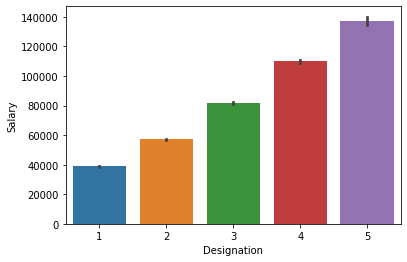

In [83]:
#plot the bar graph
sns.barplot(x='Designation', y='Salary', data=df_train)

Quite obviously, we can see that as the designation of an employee increases, his/her salary also increases and hence the high positive correlation.

Gender vs Salary

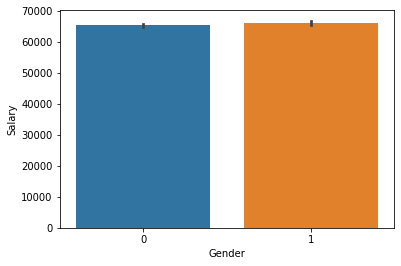

In [84]:
#plot the bar graph
sns.barplot(x='Gender', y='Salary', data=df_train)

The salary component for both gender is almost same which is a good indicator.

Quarterly rating vs Salary

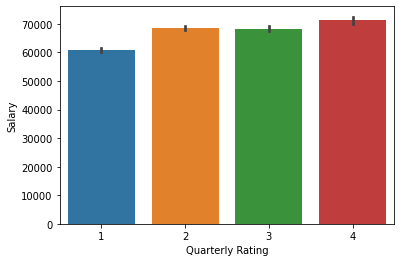

In [86]:
sns.barplot(x='Quarterly Rating', y='Salary', data=df_train)

We can possibly argue that as the rating of an employee increases, the corresponding salary also tends to increase

Based on our analysis, we could drop the Designation col now

In [249]:
df_train.drop('Designation', axis=1, inplace=True)

In [250]:
df_train.columns

Index(['Emp_ID', 'Age', 'Gender', 'Education_Level', 'Salary', 'Target',
       'Joining Designation', 'Total Business Value', 'Quarterly Rating',
       'Days_active'],
      dtype='object')

Check distribution of target class

In [251]:
df_train.head()

,Emp_ID,Age,Gender,Education_Level,Salary,Target,Joining Designation,Total Business Value,Quarterly Rating,Days_active
0,1,28,0,3,57387,0,1,2381060,2,8
1,1,28,0,3,57387,0,1,-665480,2,39
2,1,28,0,3,57387,1,1,0,2,68
3,2,31,0,3,67016,0,2,0,1,-5
4,2,31,0,3,67016,0,2,0,1,25


In [252]:
train_emp_id = df_train.copy()

In [89]:
df_train['Target'].value_counts()

0    17488
1     1616
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


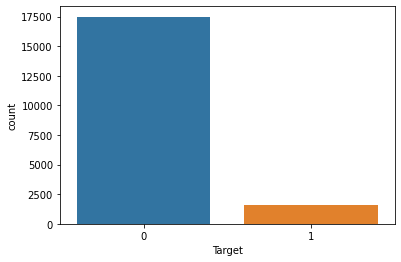

In [92]:
sns.countplot(df_train['Target'])

Our target class is highly imbalanced. (10:1) ratio

### Train Test Split

We will split the data in a 80:20 ratio 

In [96]:
#create a dataframe for the independent features
ind_vars = df_train.drop('Target', axis=1)
ind_vars.head()

,Age,Gender,Education_Level,Salary,Joining Designation,Total Business Value,Quarterly Rating,Days_active
0,28,0,3,57387,1,2381060,2,8
1,28,0,3,57387,1,-665480,2,39
2,28,0,3,57387,1,0,2,68
3,31,0,3,67016,2,0,1,-5
4,31,0,3,67016,2,0,1,25


In [98]:
#create a series for the dependent variable
dep_var = df_train['Target']
dep_var

0        0
1        0
2        1
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: Target, Length: 19104, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(ind_vars, dep_var, test_size=0.2, random_state=10)

In [100]:
X_train.shape, y_train.shape

((15283, 8), (15283,))

In [101]:
X_test.shape, y_test.shape

((3821, 8), (3821,))

### Model Building

Let us create our first model using the **random forest classifier** algorithm

In [110]:
#instantiate and fit model on train data
rfc = RandomForestClassifier(class_weight='balanced', random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=10)

In [111]:
#predict on test data
y_pred = rfc.predict(X_test)

In [112]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3420   97]
 [ 255   49]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3517
           1       0.34      0.16      0.22       304

    accuracy                           0.91      3821
   macro avg       0.63      0.57      0.58      3821
weighted avg       0.88      0.91      0.89      3821



Getting macro f1 score = 58% on test data with RFC.

Let us try with XGBoost

In [118]:
from xgboost import XGBClassifier

In [147]:
#instantiate and fit the model
xgb = XGBClassifier(max_depth=10, n_estimators=80, learning_rate=0.1, scale_pos_weight=10, random_state=10)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=10, n_estimators=80, random_state=10,
              scale_pos_weight=10)

In [148]:
#predict on test data
xgb_pred = xgb.predict(X_test)

In [149]:
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[3133  384]
 [  92  212]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3517
           1       0.36      0.70      0.47       304

    accuracy                           0.88      3821
   macro avg       0.66      0.79      0.70      3821
weighted avg       0.92      0.88      0.89      3821



We have got macro f1 score = 70% on the test data for XGBC.

Let us now use cross validation to generalize the results on both train and test data

Set the no of folds for cross validation

In [152]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

In [154]:
scores = cross_val_score(xgb, X_train, y_train, cv = kfold, scoring = 'f1_macro', verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished


In [155]:
#print the scores for CV
print(scores)

[0.68617521 0.70170893 0.72189995 0.7034407  0.70616797]


In [156]:
#predict on the test set
y_pred_xgb = xgb.predict(X_test)

In [157]:
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[3133  384]
 [  92  212]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3517
           1       0.36      0.70      0.47       304

    accuracy                           0.88      3821
   macro avg       0.66      0.79      0.70      3821
weighted avg       0.92      0.88      0.89      3821



We have got generalized results on the test data i.e 70% for the macro f1 score

In [253]:
#get train_emp_id
train_emp_id.head()

,Emp_ID,Age,Gender,Education_Level,Salary,Target,Joining Designation,Total Business Value,Quarterly Rating,Days_active
0,1,28,0,3,57387,0,1,2381060,2,8
1,1,28,0,3,57387,0,1,-665480,2,39
2,1,28,0,3,57387,1,1,0,2,68
3,2,31,0,3,67016,0,2,0,1,-5
4,2,31,0,3,67016,0,2,0,1,25


In [254]:
df_test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


Join the two dataframes by using inner join on emp_id column



In [301]:
df_emp = train_emp_id.merge(df_test, on='Emp_ID', how='inner')
df_emp.head()

,Emp_ID,Age,Gender,Education_Level,Salary,Target,Joining Designation,Total Business Value,Quarterly Rating,Days_active
0,2,31,0,3,67016,0,2,0,1,-5
1,2,31,0,3,67016,0,2,0,1,25
2,6,31,1,2,78728,0,3,0,1,1
3,6,31,1,2,78728,0,3,0,1,32
4,6,31,1,2,78728,0,3,0,2,62


In [302]:
#check the size of new dataframe
df_emp_final =  df_emp.drop_duplicates(subset='Emp_ID', keep='first')
df_emp_final.head()

,Emp_ID,Age,Gender,Education_Level,Salary,Target,Joining Designation,Total Business Value,Quarterly Rating,Days_active
0,2,31,0,3,67016,0,2,0,1,-5
2,6,31,1,2,78728,0,3,0,1,1
7,11,28,1,3,42172,0,1,0,1,-6
8,14,39,1,1,19734,0,3,0,1,-15
11,25,29,0,2,102077,0,1,2552300,3,428


In [303]:
#check the shape
df_emp_final.shape

(741, 10)

In [305]:
#get emp_id for test data
test_file_ids = df_emp_final['Emp_ID']
test_file_ids.reset_index(drop=True, inplace=True)
test_file_ids

0         2
1         6
2        11
3        14
4        25
       ... 
736    2775
737    2778
738    2781
739    2784
740    2788
Name: Emp_ID, Length: 741, dtype: int64

In [306]:
df_emp_final.drop(['Emp_ID', 'Target'], axis=1, inplace=True)
df_emp_final.reset_index(drop=True, inplace=True)
df_emp_final.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Gender,Education_Level,Salary,Joining Designation,Total Business Value,Quarterly Rating,Days_active
0,31,0,3,67016,2,0,1,-5
1,31,1,2,78728,3,0,1,1
2,28,1,3,42172,1,0,1,-6
3,39,1,1,19734,3,0,1,-15
4,29,0,2,102077,1,2552300,3,428


In [313]:
#get predictions on the test set
final_predictions = xgb.predict(df_emp_final)

In [308]:
#create submission df
submission_1 = pd.DataFrame([test_file_ids, final_predictions]).T
submission_1.head()

,Emp_ID,Unnamed 0
0,2,0
1,6,0
2,11,0
3,14,0
4,25,0


In [309]:
submission_1.tail()

,Emp_ID,Unnamed 0
736,2775,0
737,2778,0
738,2781,0
739,2784,0
740,2788,0


In [310]:
submission_1.dtypes

Emp_ID       int64
Unnamed 0    int64
dtype: object

In [314]:
#rename the unnamed column
submission_1.rename(columns={"Unnamed 0": "Target"}, inplace=True)
submission_1.head()

,Emp_ID,Target
0,2,0
1,6,0
2,11,0
3,14,0
4,25,0


In [315]:
#check the shape
submission_1.shape

(741, 2)

In [316]:
#save the file in csv format and then download the file
from google.colab import files

In [318]:
submission_1.to_csv('submission_1.csv',index = False)

In [319]:
files.download("submission_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>